# Business Context
This case requires trainees to develop a model for predicting fraudulent transactions for a 
financial company and use insights from the model to develop an actionable plan. Data for the 
case is available in CSV format having 6362620 rows and 10 columns

# Importing Libraries 📕📗📘
# ![](https://media3.giphy.com/media/7E8lI6TkLrvvAcPXso/200w.webp?cid=ecf05e47gdqv5pdj8vy567mreujdobhq7nm0jwq3pjjdlqj0&rid=200w.webp)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for visualization
import plotly.express as px # for visualization
import matplotlib.pyplot as plt # for visualization
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Loading Data:

In [2]:
df = pd.read_csv('C:/Users/HP/Downloads/Fraud.csv')

In [3]:
df.head()
df.shape

(6362620, 11)

# Data Definitions :

| Feature                                | Description                                                                                     |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| step                     | maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).s                                                                                               |
| type          | CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.                                                                                                 |
| amount      | amount of the transaction in local currency.                                                                                                  |
| nameOrig                                    | customer who started the transaction
                           |
| oldbalanceOrg                                 | initial balance before the transaction                                                                                                |
| newbalanceOrig        | new balance after the transaction                                                                                             |
| nameDest                          | customer who is the recipient of the transaction                                                                                             |
| oldbalanceDest                       | initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
                         |
| newbalanceDest                              | new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
                          |
| isFraud                            | This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
                           |
| isFlaggedFraud                          | The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.|                                                                                                                                                

# Data Preprocessing

In [4]:
#column information
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#summary statistics test
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Percentage of Missing Values

In [6]:
#It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


### No missing value found in this dataset.

In [7]:
# write your code here
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
#Understanding the data column so that we can deep down in this project.

df.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [9]:

df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
#Let's check the value counts for isFraud:
print("IsFraud:\n", df.isFraud.value_counts(), "\n\n")

IsFraud:
 0    6354407
1       8213
Name: isFraud, dtype: int64 




In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


### These statistics represent the summary of different numerical features in the dataset:

1. step: There are 6,362,620 data points in this feature. The average value is about 243.40, while the standard deviation is about 142.33. The range starts at 1 and goes all the way up to 743.
2. amount: There are 6,362,620 data points in this feature. A significant standard deviation of roughly 603,858.20 is present with a mean value of about 179,861.90. The minimum and maximum transaction amounts are 0 and around 92,445,520, respectively.
3. oldbalanceOrg: There are 6,362,620 data points in this feature. The average old balance in the originating account is about 833,883.10 in value. 2,888,243.30 is the standard deviation's approximate value. The previous balance ranges from 0 (the minimum) to 59,585,040 (the maximum).
4. newbalanceOrig: There are 6,362,620 data points in this feature, according to newbalanceOrig. The new balance in the originating account has a mean value of about 855,113.70. 2,924,049.10 is the standard deviation's estimated value. The new balance ranges from 0 (the least) to 49,585,040 (the maximum).
5. oldbalanceDest: There are 6,362,620 data points in this feature. Approximately 1,100,702.20 is the mean value of the former amount in the destination account. 3,399,179.90 is the standard deviation's approximate value. The destination account's former balance can be as low as zero or as high as around 356,015,900.
6. newbalanceDest: There are 6,362,620 data points in this feature, according to newbalanceDest. Approximately 1,224,996.10 is the average new balance in the destination account. 3,674,128.90 is the standard deviation's estimated value. The greatest new balance is roughly 356,179,300, and the smallest new balance is 0.    
7. isFraud: This feature has 6,362,620 data points and is binary (0 or 1). The dataset has a low incidence of fraud, as indicated by the mean value, which is roughly 0.00129.
8. isFlaggedFraud: There are 6,362,620 data points in this binary characteristic. The dataset's mean value, which is extremely low at about 2.51e-06, shows that reported fraud hardly occasionally occurs.    

## Now our next step is checking Outliers

  <tr><td>
    <img src="https://miro.medium.com/max/1050/1*2c21SkzJMf3frPXPAR_gZA.png"
         width="400" height="300">
      <tr><td align="LEFT">

Text(0.5, 1.0, 'amount')

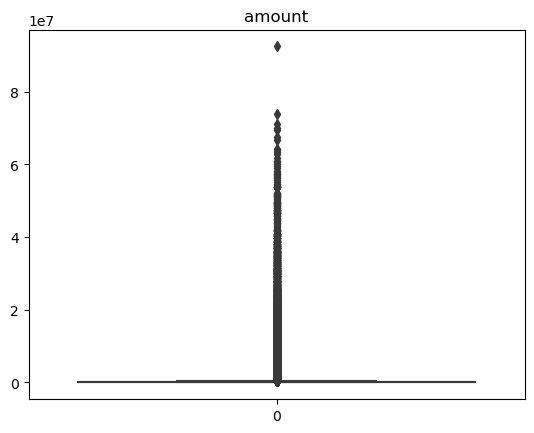

In [12]:
# I personally prefer a vertical view and a cyan color
sns.boxplot(data=df['amount'],orient="v", color = 'c')
plt.title("amount")

Text(0.5, 1.0, 'step')

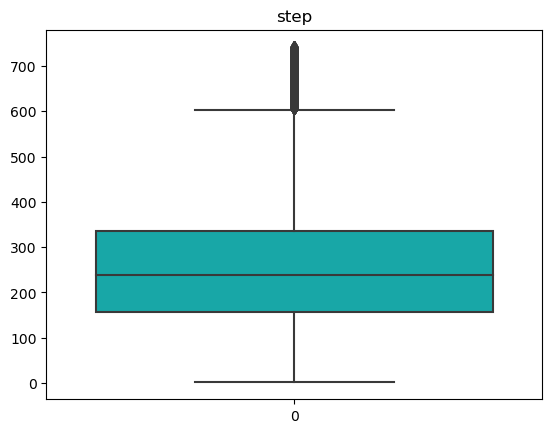

In [13]:
sns.boxplot(data=df['step'],orient="v", color = 'c')
plt.title("step")

Text(0.5, 1.0, 'oldbalanceOrg')

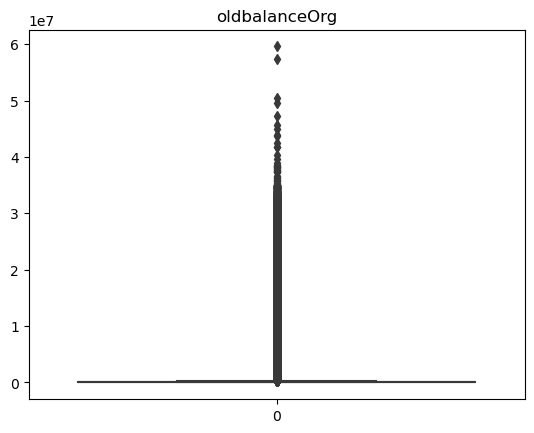

In [14]:
sns.boxplot(data=df['oldbalanceOrg'],orient="v", color = 'c')
plt.title("oldbalanceOrg")

Text(0.5, 1.0, 'newbalanceOrig')

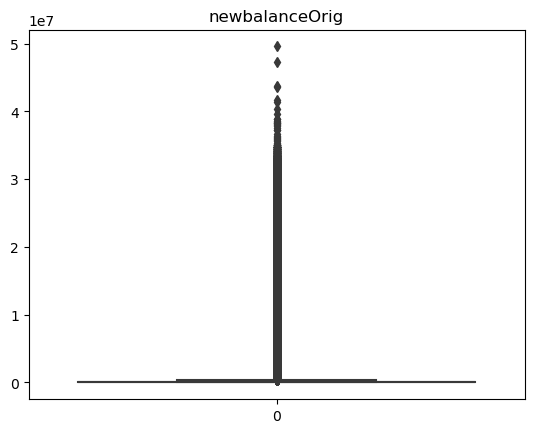

In [15]:
sns.boxplot(data=df['newbalanceOrig'],orient="v", color = 'c')
plt.title("newbalanceOrig")

Text(0.5, 1.0, 'oldbalanceDest')

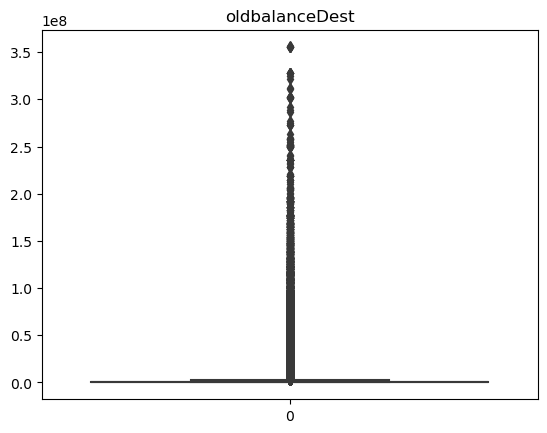

In [16]:
sns.boxplot(data=df['oldbalanceDest'],orient="v", color = 'c')
plt.title("oldbalanceDest")

Text(0.5, 1.0, 'newbalanceDest')

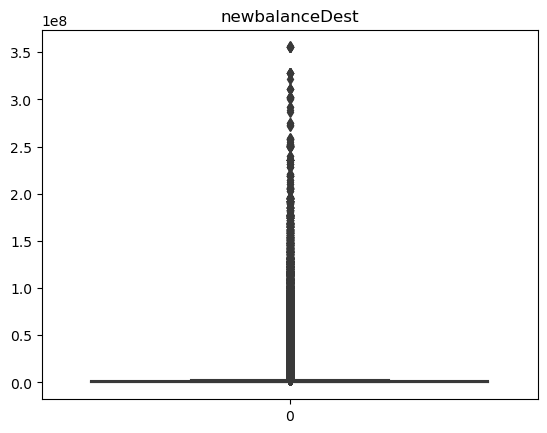

In [17]:
sns.boxplot(data=df['newbalanceDest'],orient="v", color = 'c')
plt.title("newbalanceDest")

Text(0.5, 1.0, 'isFlaggedFraud')

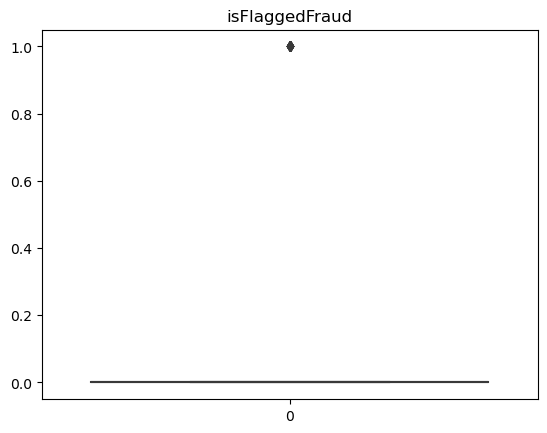

In [18]:
# I personally prefer a vertical view and a cyan color
sns.boxplot(data=df['isFlaggedFraud'],orient="v", color = 'c')
plt.title("isFlaggedFraud")

### Here I treating outliers with quantile method.

In [19]:
# Let's compute IQR for each numerical feature
df_IQR = df[df.select_dtypes([float, int]).columns].quantile(.75) - df[df.select_dtypes([float, int]).columns].quantile(.25)
df_IQR

# Let's compute maximum and minimum limits
df_Max =  df[df.select_dtypes([float, int]).columns].quantile(.75) + (1.5*df_IQR)
df_Min =  df[df.select_dtypes([float, int]).columns].quantile(.25) - (1.5*df_IQR)
df_Max

step              6.035000e+02
amount            5.017193e+05
oldbalanceOrg     2.682879e+05
newbalanceOrig    3.606460e+05
oldbalanceDest    2.357592e+06
newbalanceDest    2.779773e+06
isFraud           0.000000e+00
isFlaggedFraud    0.000000e+00
dtype: float64

In [20]:
df['isFraud'] = df['isFraud'].map({0: 'legitimate', 1: 'fraudulent'})

#We can Handling the outliers of each numerical feature :

df.select_dtypes([float, int]).columns

col_IQR = df['step'].quantile(.75) - df['step'].quantile(.25)
col_Max =  df['step'].quantile(.75) + (1.5*col_IQR)
col_Max

603.5

In [21]:
#Now we will replace outliers of each column with Lower and Upper bounds of each column:

# Loop for replacing outliers above upper bound with the upper bound value:
for column in df.select_dtypes([float, int]).columns :

    col_IQR = df[column].quantile(.75) - df[column].quantile(.25)
    col_Max =  df[column].quantile(.75) + (1.5*col_IQR)
    df[column][df[column] > col_Max] =  col_Max

# Loop for replacing outliers under lower bound with the lower bound value:
for column in df.select_dtypes([float, int]).columns :
    col_IQR = df[column].quantile(.75) - df[column].quantile(.25)
    col_Min =  df[column].quantile(.25) - (1.5*col_IQR)
    df[column][df[column] < col_Min] =  col_Min

Text(0.5, 1.0, 'amount')

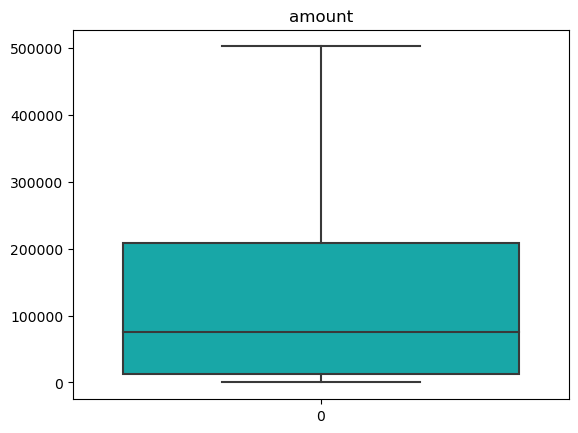

In [22]:
# Check, boxplot after handling outliers:
sns.boxplot(data=df['amount'],orient="v", color = 'c')
plt.title("amount")

Text(0.5, 1.0, 'step')

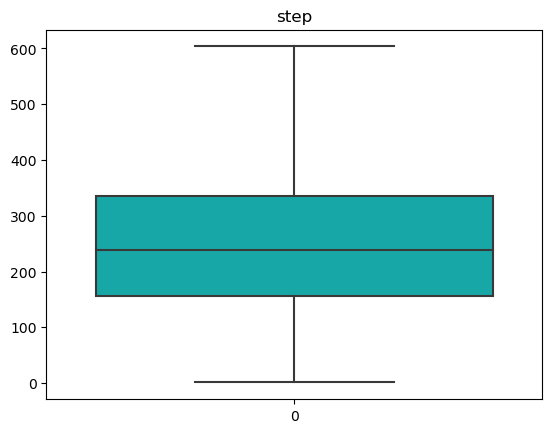

In [23]:
sns.boxplot(data=df['step'],orient="v", color = 'c')
plt.title("step")

Text(0.5, 1.0, 'oldbalanceOrg')

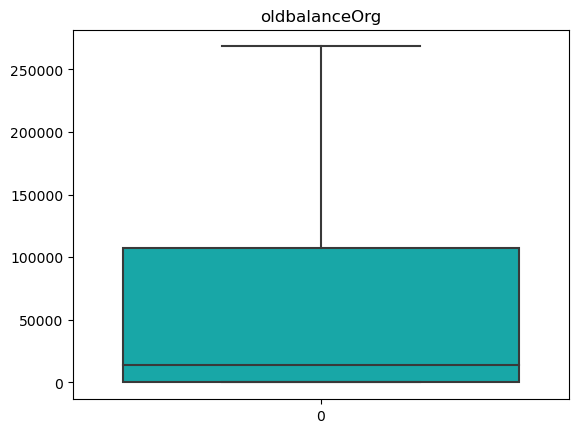

In [24]:
sns.boxplot(data=df['oldbalanceOrg'],orient="v", color = 'c')
plt.title("oldbalanceOrg")

Text(0.5, 1.0, 'newbalanceOrig')

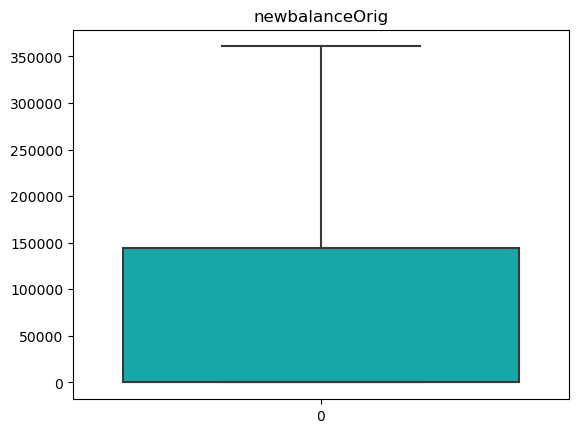

In [25]:
sns.boxplot(data=df['newbalanceOrig'],orient="v", color = 'c')
plt.title("newbalanceOrig")

Text(0.5, 1.0, 'oldbalanceDest')

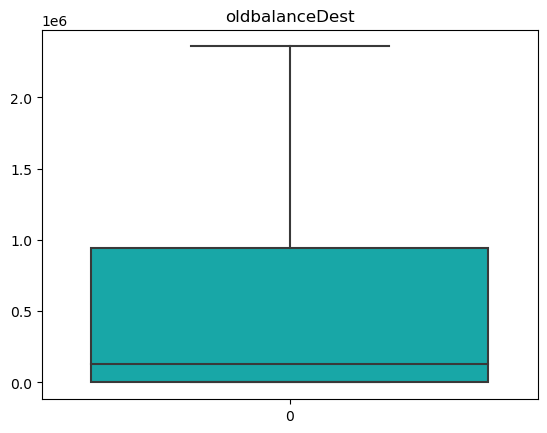

In [26]:
sns.boxplot(data=df['oldbalanceDest'],orient="v", color = 'c')
plt.title("oldbalanceDest")

Text(0.5, 1.0, 'newbalanceDest')

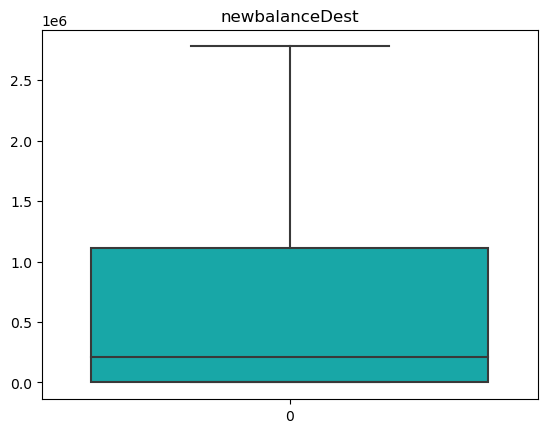

In [27]:
sns.boxplot(data=df['newbalanceDest'],orient="v", color = 'c')
plt.title("newbalanceDest")

Text(0.5, 1.0, 'isFlaggedFraud')

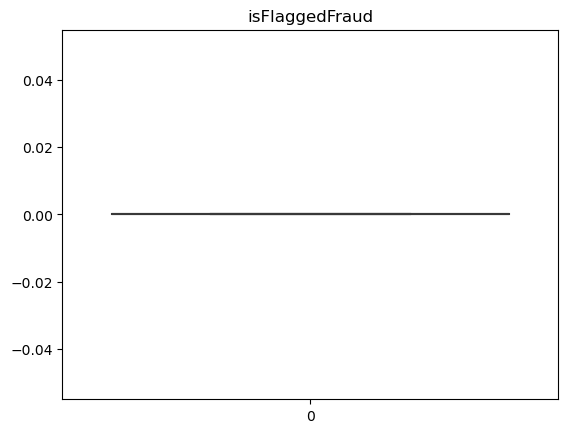

In [28]:
sns.boxplot(data=df['isFlaggedFraud'],orient="v", color = 'c')
plt.title("isFlaggedFraud")

# Data Visualization 📊

## Skewness

In [30]:
numerical_columns = ["step","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

step
Skew : 0.22


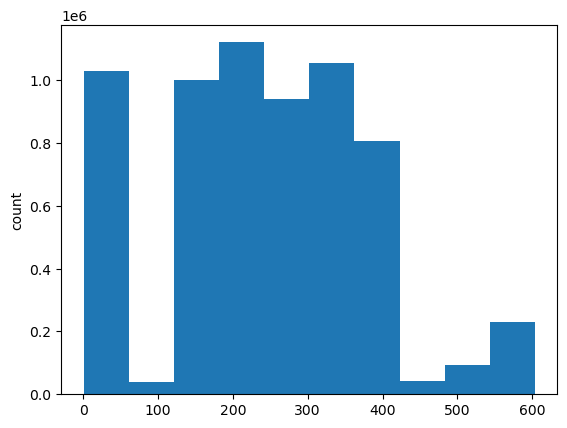

amount
Skew : 1.18


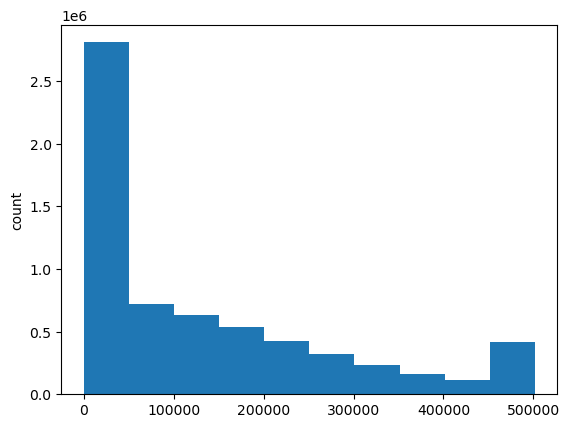

oldbalanceOrg
Skew : 1.17


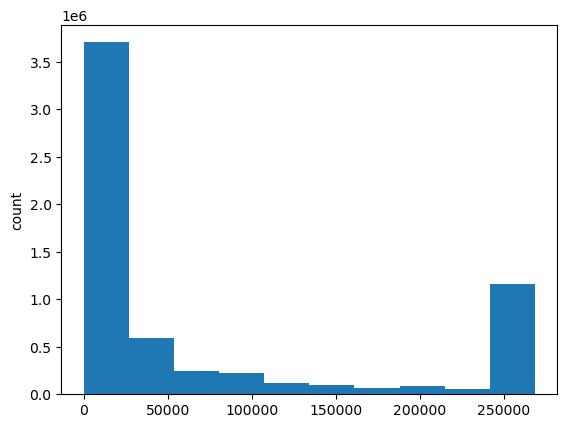

newbalanceOrig
Skew : 1.22


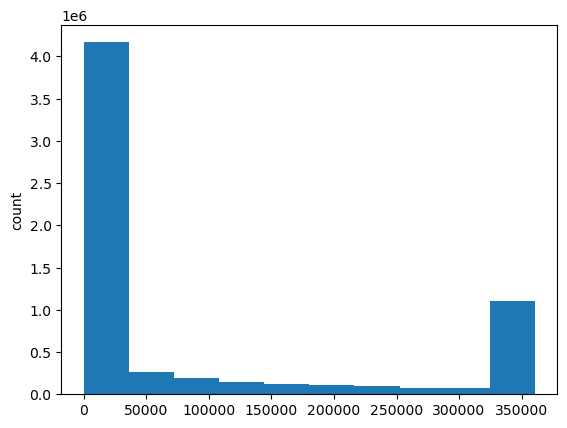

oldbalanceDest
Skew : 1.22


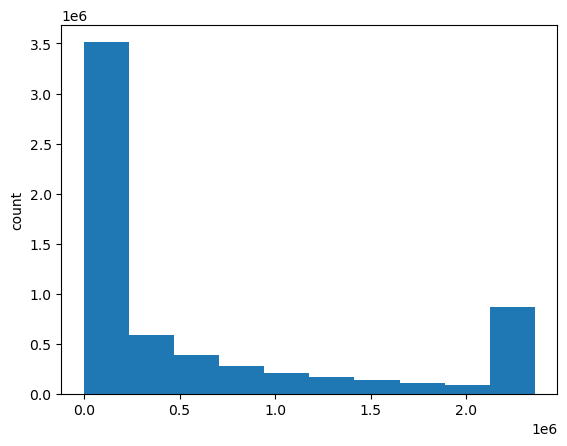

newbalanceDest
Skew : 1.22


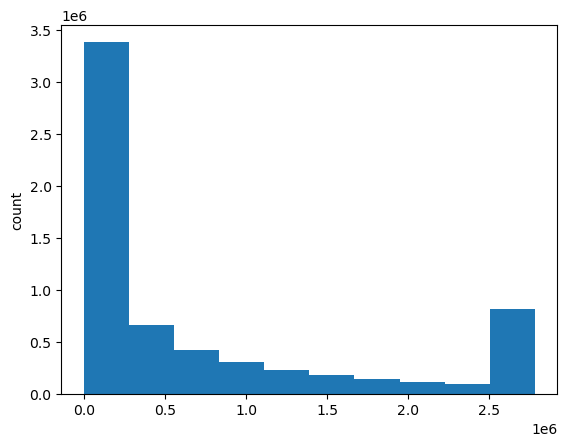

In [31]:
#histogram for numerical data
for col in numerical_columns:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.show()

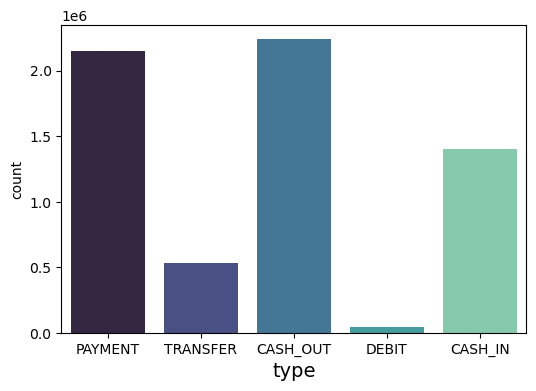

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='type' , data=df ,palette='mako')
plt.xlabel('type', fontsize=14)
plt.show()

#### Cash-out type has highest count

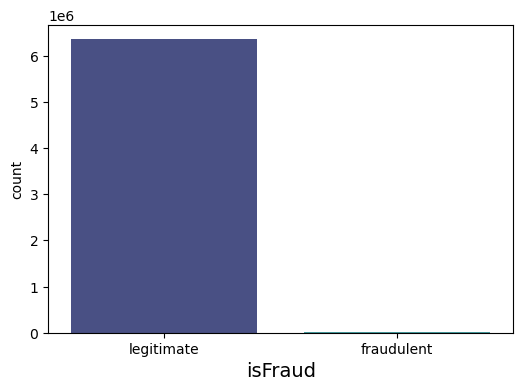

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud' , data=df ,palette='mako')
plt.xlabel('isFraud', fontsize=14)
plt.show()

#### Number of legitimates are high compare to fraudulents

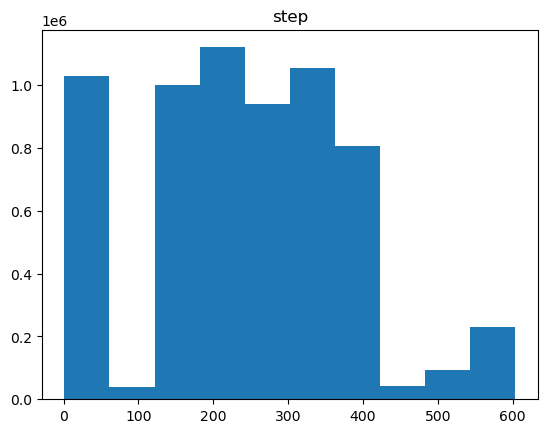

In [34]:
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  df[num]

plt.hist(df['step'])
plt.title("step")
plt.show()

#### Steps arund 200-250 are highest in our dataset.

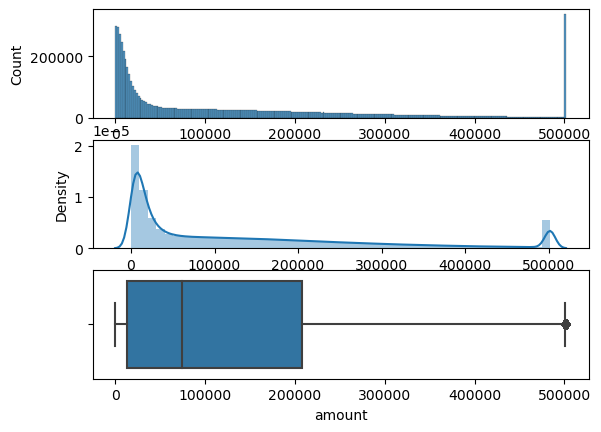

In [35]:
#amount distribution of the legitimate :

df.amount[df.isFraud=='legitimate'].describe()

fig, axs = plt.subplots(nrows= 3)

sns.histplot(df.amount[df.isFraud=='legitimate'], ax=axs[0]);
sns.distplot(df.amount[df.isFraud=='legitimate'], ax=axs[1])
sns.boxplot(df.amount[df.isFraud=='legitimate'], ax=axs[2]);

1. Highest amount according to legitimates are 500000.
2. Data is Right skewed.
3. There are only some outliers present.

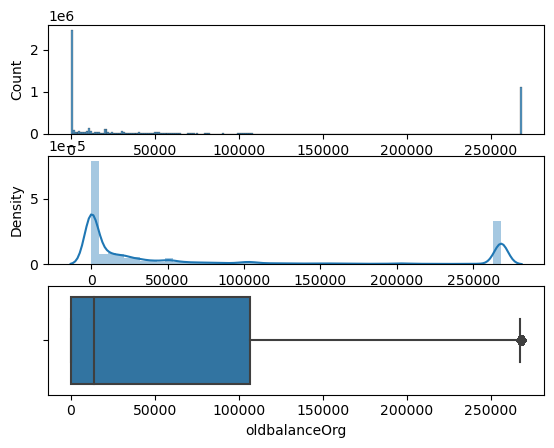

In [36]:
#oldbalanceOrg distribution of the legitimate :

df.oldbalanceOrg[df.isFraud=='legitimate'].describe()

fig, axs = plt.subplots(nrows= 3)

sns.histplot(df.oldbalanceOrg[df.isFraud=='legitimate'], ax=axs[0]);
sns.distplot(df.oldbalanceOrg[df.isFraud=='legitimate'], ax=axs[1])
sns.boxplot(df.oldbalanceOrg[df.isFraud=='legitimate'], ax=axs[2]);

1. Less than 50000 are the highest count.
2. Data is right skewed.
3. There is one-two outliers present in our data.

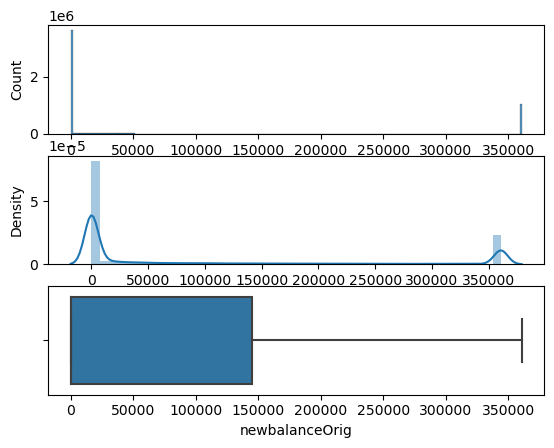

In [37]:
#newbalanceOrg distribution of the legitimate :

df.newbalanceOrig[df.isFraud=='legitimate'].describe()

fig, axs = plt.subplots(nrows= 3)

sns.histplot(df.newbalanceOrig[df.isFraud=='legitimate'], ax=axs[0]);
sns.distplot(df.newbalanceOrig[df.isFraud=='legitimate'], ax=axs[1])
sns.boxplot(df.newbalanceOrig[df.isFraud=='legitimate'], ax=axs[2]);

1. Data is right skewed.
2. No outliers present.

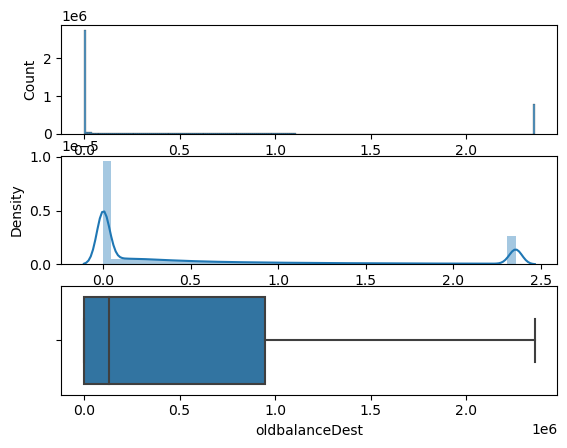

In [38]:
#oldbalanceDest distribution of the legitimate :

df.oldbalanceDest[df.isFraud=='legitimate'].describe()

fig, axs = plt.subplots(nrows= 3)

sns.histplot(df.oldbalanceDest[df.isFraud=='legitimate'], ax=axs[0]);
sns.distplot(df.oldbalanceDest[df.isFraud=='legitimate'], ax=axs[1])
sns.boxplot(df.oldbalanceDest[df.isFraud=='legitimate'], ax=axs[2]);

1. Data is right skewed.
2. No outliers present.

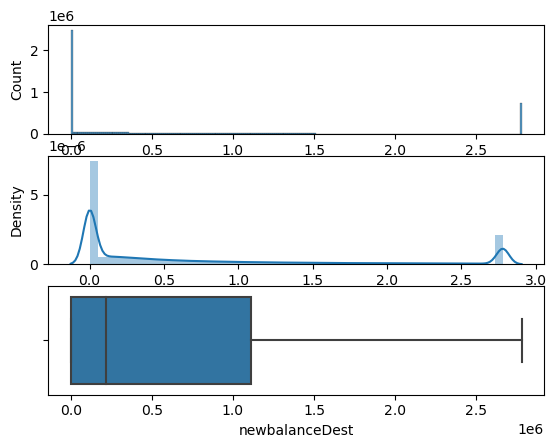

In [39]:
#newbalanceDest distribution of the legitimate :

df.newbalanceDest[df.isFraud=='legitimate'].describe()

fig, axs = plt.subplots(nrows= 3)

sns.histplot(df.newbalanceDest[df.isFraud=='legitimate'], ax=axs[0]);
sns.distplot(df.newbalanceDest[df.isFraud=='legitimate'], ax=axs[1])
sns.boxplot(df.newbalanceDest[df.isFraud=='legitimate'], ax=axs[2]);

1. Data shows right skewed.
2. No outliers present.

# Performing the encoding

In [40]:
# Let's perform categorical features encoding:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df['isFraud'] = df['isFraud'].map({'legitimate':0, 'fraudulent':1})

In [41]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Fit and transform the 'type' , 'nameOrig' and 'nameDest' columns
df['type'] = LE.fit_transform(df['type'])
df['nameOrig'] = LE.fit_transform(df['nameOrig'])
df['nameDest'] = LE.fit_transform(df['nameDest'])

In [42]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']
print(x.shape, y.shape)

(6362620, 9) (6362620,)


In [43]:
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1.0,3,9839.64000,757869,170136.0000,160296.36,1662094,0.000000e+00,0.000
1,1.0,3,1864.28000,2188998,21249.0000,19384.72,1733924,0.000000e+00,0.000
2,1.0,4,181.00000,1002156,181.0000,0.00,439685,0.000000e+00,0.000
3,1.0,1,181.00000,5828262,181.0000,0.00,391696,2.118200e+04,0.000
4,1.0,3,11668.14000,3445981,41554.0000,29885.86,828919,0.000000e+00,0.000
...,...,...,...,...,...,...,...,...,...
6362615,603.5,1,339682.13000,5651847,268287.9375,0.00,505863,0.000000e+00,339682.130
6362616,603.5,4,501719.33875,1737278,268287.9375,0.00,260949,0.000000e+00,0.000
6362617,603.5,1,501719.33875,533958,268287.9375,0.00,108224,6.848884e+04,2779773.125
6362618,603.5,4,501719.33875,2252932,268287.9375,0.00,319713,0.000000e+00,0.000


In [44]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

# To check Multicollinearity of data

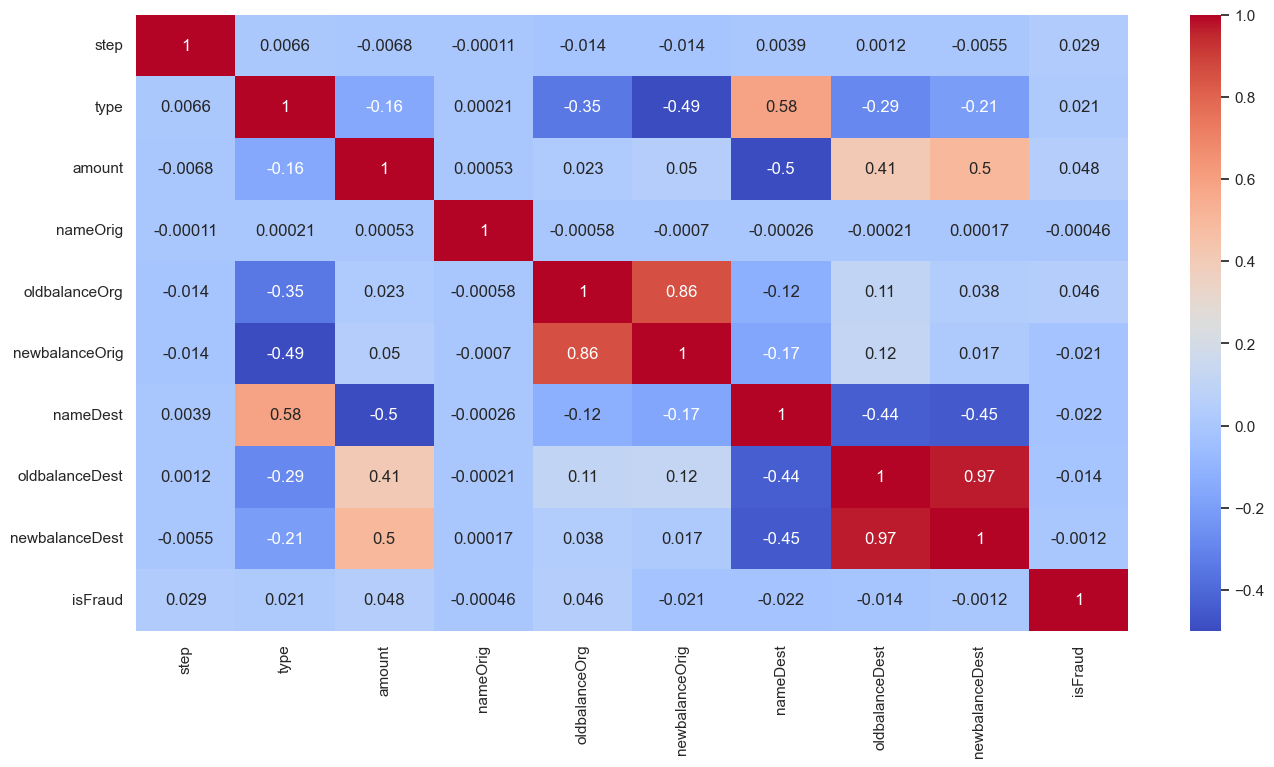

In [45]:
# Let's produce Heat Map
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm');

In [46]:
# A function to select highly correlated features.
def Correlation(dataset, threshold):
    correltated_features = set() # as a container of highly correlated features
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                column_name = correlation_matrix.columns[i]
                correltated_features.add(column_name)
    return correltated_features

In [47]:
# let's selected features with a correlation factor > 0.8
Correlation(x, 0.8)

{'newbalanceDest', 'newbalanceOrig'}

In [ ]:
x.drop(columns= ['newbalanceDest'], inplace = True )

In [65]:
# Now we can drop this features from our dataset
x.drop(columns= ['newbalanceOrig'], inplace = True )

### After performing correlation, we see that two column has correlation greater than .8 than we drop these two variables.

# Model Building

### The Process of Modeling the Data:
- Importing the model
- Fitting the model
- Predicting
- Regression metrics

### Metrices
1. Accuracy measures the overall correctness of the model's predictions.
2. Precision focuses on the proportion of positive predictions that are actually positive.
3. Recall focuses on the proportion of actual positives that are correctly classified.
4. F1 Score provides a balance between precision and recall and is especially useful when dealing with imbalanced class distributions

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [50]:
#Prepare the Data
x = df.drop(['isFraud'], axis=1)
y = df['isFraud']

In [51]:
# Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
# Feature Selection
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [53]:
# Use XGBoost to identify feature importance and select important features
model = XGBClassifier()
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [54]:
from sklearn.feature_selection import SelectFromModel

feature_importances = model.feature_importances_
selector = SelectFromModel(model, threshold=0.05, prefit=True)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

In [55]:
#Build Fraud Detection Model
from sklearn.linear_model import LogisticRegression

fraud_model = LogisticRegression()
fraud_model.fit(X_train_selected, y_train)

LogisticRegression()

In [56]:
#Model Evaluation
y_pred = fraud_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [57]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9987269395311994
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.5


## Accuracy of our model is 99%. It indicates the overfitting problem.

### So we perform hyperparamter tuning, gridsearchcv and evaluate the model.

In [66]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [67]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


rf_model = RandomForestClassifier(random_state=42)

In [70]:
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42, scoring='accuracy')

In [71]:
# Sample a subset of the data for tuning
sample_size = 10000  # Adjust the sample size as needed based on your computational resources
subset_indices = np.random.choice(len(X_train_scaled), sample_size, replace=False)
X_train_subset = X_train_scaled[subset_indices]
y_train_subset = y_train.iloc[subset_indices]

In [72]:
# Perform hyperparameter tuning on the subset of data
random_search.fit(X_train_subset, y_train_subset)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [73]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [74]:
# Build Fraud Detection Model
fraud_model = best_model
fraud_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [75]:
# Model Evaluation
y_pred = fraud_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [76]:
print("Best Hyperparameters:", best_params)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Accuracy: 0.9996479437715909
Precision: 0.9614173228346456
Recall: 0.7537037037037037
F1-Score: 0.8449826989619377
ROC AUC: 0.8768325742352892
Confusion Matrix:
 [[1270855      49]
 [    399    1221]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.75      0.84      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



# Conclusion: 

The confusion matrix demonstrates that the model accurately predicted 1,270,076 non-fraudulent transactions (true negatives) and 1,221 fraudulent transactions (true positives) out of 1,270,524 samples in the assessment dataset. It incorrectly identified 49 fraudulent transactions as legitimate (false negatives) and 399 legitimate transactions as fraudulent (false positives).

The classification report, which has high precision, recall, and F1-score for the positive class (fraudulent transactions), further attests to the model's successful performance. Strong overall performance on the evaluation dataset is also indicated by the macro-average and weighted average of the measures. Overall, it appears that the model is accurately detecting fraudulent transactions while still performing well.

## I'll walk you through each stage for what I done, while giving a general overview:

1. Data preprocessing: The first step is to search the dataset for missing values and outliers. There are no missing values discovered, and the quantile approach is used to handle outliers.

2. Data visualisation: To comprehend the distribution and find potential insights, the data is displayed using histograms and box plots.

3. Encoding: To make categorical variables like "type," "nameOrig," and "nameDest" into numeric forms for modelling, they are label-encoded.

4. Heatmaps are created to check for multicollinearity between features during the multicollinearity check process. Features that are highly linked are found and removed from the dataset.

5. The dataset is divided into training and testing sets for model building. A fraud detection model is constructed using XGBoost, and feature selection is carried out using XGBoost's feature significance.

6. RandomizedSearchCV is used to fine-tune the hyperparameters of the Random Forest classifier.

7. Evaluation of the Model: The accuracy, precision, recall, F1-score, and ROC AUC metrics are used to assess the performance of the final fraud detection model.